In [1]:
import pandas as pd
from fbprophet import Prophet
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [72]:
# Reading hourly electricity demand data from the source file (.csv)
electricity_demand = pd.read_csv(r"C:\Users\codingPurposes\Desktop\rawData\electricity_demand\hourly_electricity_demand.csv")

In [52]:
df = pd.DataFrame()
# Create a 'x' and 'y' column for convenience
df['Load'] = electricity_demand['NL_load']     # create a new y-col (optional)
df['Hours'] = np.arange(len(df))

lin_reg = LinearRegression()
lin_reg.fit(X=df['Hours'].values[:, np.newaxis], y=df['Load'].values[:, np.newaxis])

# Make predictions w.r.t. 'x' and store it in a column called 'y_pred'
df['Load_pred'] = lin_reg.predict(df['Hours'].values[:, np.newaxis])

# Plot 'y' and 'y_pred' vs 'x'
df[['Load', 'Load_pred', 'Hours']].plot(x='Hours', figsize=(16,6))  # Remember 'y' is 'Adj Close'

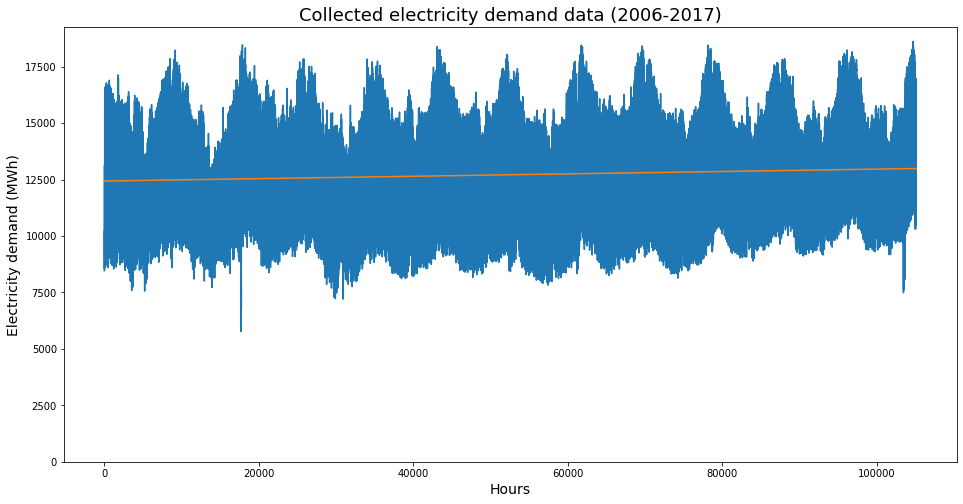

In [65]:
f, ax = plt.subplots(figsize=(16, 8))
ydata = electricity_demand["NL_load"]
ydata2 = forecast_lean["yhat"]
linedata = df["Load_pred"]
plt.xlabel("Hours", {'fontsize': 14})
plt.ylabel("Electricity demand (MWh)", {'fontsize': 14})
plt.title("Collected electricity demand data (2006-2017)", {'fontsize': 18})
ax.plot(ydata)
ax.plot(linedata)
ax.set_ylim(ymin=0)
plt.savefig(r'C:\Users\codingPurposes\Desktop\for_report\Collected electricity demand data (2006-2017).png')
plt.show(f)

In [ ]:
# Reading hourly electricity demand data from the source file (.csv)
electricity_demand = pd.read_csv(r"C:\Users\codingPurposes\Desktop\rawData\electricity_demand\hourly_electricity_demand.csv")

# Formatting the dataframe with respect to the requirements of "fbprophet"
firstRowDate = "1/1/2006"
electricity_demand.insert(0, "ds", pd.date_range(start=firstRowDate, periods=len(electricity_demand), freq='H'))
electricity_demand = electricity_demand.rename({'NL_load': 'y'}, axis=1)

# Running "Prophet" to predict hourly electricity demand between "01.01.2020 00:00-01:00" and "31.12.2049 23:00-00:00". 
m = Prophet()
m.fit(electricity_demand)

# 8760*32 --> from 2018 to 2050, "H" --> hourly
future = m.make_future_dataframe(periods=8760*32, freq='H' )

# Creating a new dataframe with forecasted data. 
forecast = m.predict(future)
forecast.to_json(r"C:\Users\codingPurposes\Desktop\processedData\processed_electricity_demand\forecast_electricity.json", orient="split")

# Checkpoint 1

In [ ]:
forecast_lean = pd.read_json(r"C:\Users\codingPurposes\Desktop\processedData\processed_electricity_demand\forecast_electricity.json", orient="split")

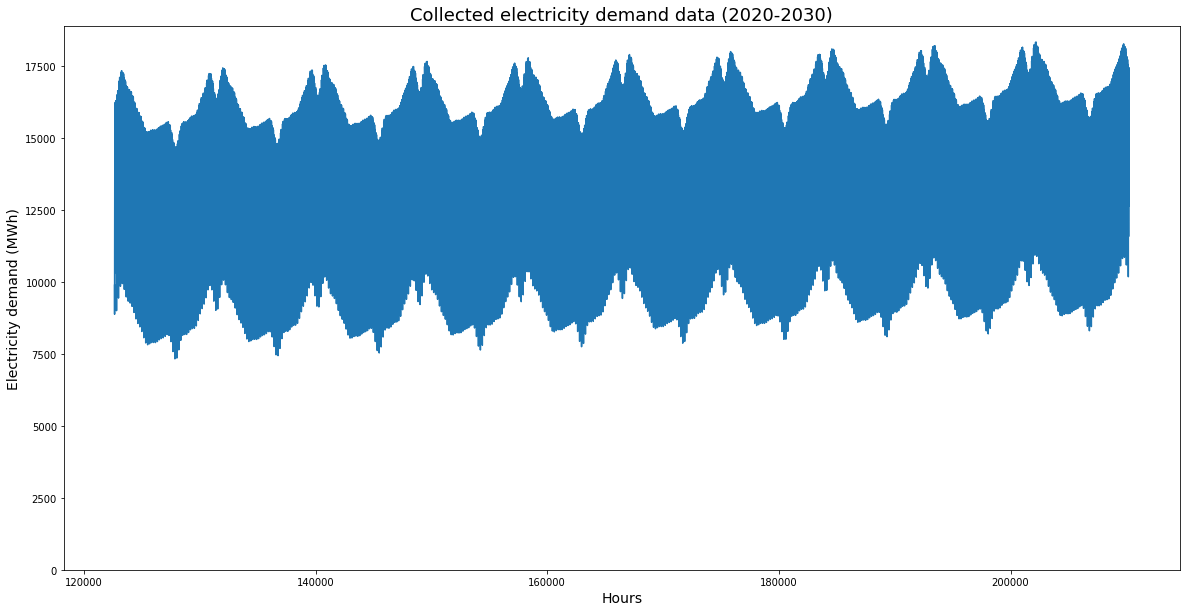

In [63]:
forecast_lean = forecast_lean[['yhat']].iloc[122640:122640+87600,:]
f, ax = plt.subplots(figsize=(20, 10))
ydata = forecast_lean["yhat"]
plt.xlabel("Hours", {'fontsize': 14})
plt.ylabel("Electricity demand (MWh)", {'fontsize': 14})
plt.title("Collected electricity demand data (2020-2030)", {'fontsize': 18})
ax.plot(ydata)
ax.set_ylim(ymin=0)
plt.savefig(r'C:\Users\codingPurposes\Desktop\for_report\Collected electricity demand data (2020-2030).png')
plt.show(f)

In [ ]:
# Selecting predicted values (only for 2020to2050)
forecast_lean = forecast_lean[['yhat']].iloc[122640:,:]
ax = forecast_lean.plot(figsize=[16,6])
ax.set_xlabel("Hours")
ax.set_ylabel("Electricity demand, MWh")

In [ ]:
forecast_lean = forecast_lean.reset_index(drop=True)
forecast_lean.to_json(r"C:\Users\codingPurposes\Desktop\processedData\processed_electricity_demand\forecast_electricity_lean.json", orient="split")

# Checkpoint 2

In [2]:
forecast_lean = pd.read_json(r"C:\Users\codingPurposes\Desktop\processedData\processed_electricity_demand\forecast_electricity_lean.json", orient="split")

for d in tqdm(range(3650*3)):
    for h in range(24):
        forecast_lean.loc[(d*24)+h, "dayIndex"] = d

representativeDays = [149, 336, 1255, 1381, 1414, 1486, 2239, 3284, 3462]
listHours = []

for y in range(3):
    for d in representativeDays:
        for h in range(24):
            listHours.append(24*(d+y*3650) + h)

forecast_lean = forecast_lean[forecast_lean.index.isin(listHours)]
forecast_lean = forecast_lean.reset_index(drop=True)

100%|██████████| 10950/10950 [00:47<00:00, 229.87it/s]


In [15]:
for i in range(216):
    print(forecast_lean.loc[i,"yhat"])

11370.0118172488
10892.1355417981
10562.0369710328
10433.9897600298
10652.100159523
11332.7589449961
12414.1951798344
13621.9870040149
14604.7158761676
15141.0195729874
15252.2817745174
15137.7298549442
15002.4922620988
14930.5147347198
14892.8911472727
14846.0962746139
14798.937887195
14779.7910159384
14753.9697542463
14599.251531338
14186.1044468294
13494.0352704283
12648.7449860916
11838.2300193767
10717.8176979109
10207.8933024174
9856.1096195337
9716.6134979546
9933.3202481983
10622.3680811401
11721.6748742203
12956.4524224796
13974.8645636356
14555.0844385043
14717.9886695973
14662.2600285389
14592.4499245703
14591.8999103225
14631.0779408231
14665.816623577
14704.2708160993
14774.1573564854
14840.1322420272
14779.3201396626
14461.5467700249
13865.6917239381
13116.8485482841
12402.430202667
11779.2225202921
11301.5628543012
10971.6788014454
10843.8440065012
11062.1647100088
11743.0316774912
12824.673962375
14032.669694903
15015.6003243277
15552.1036177645
15663.5632460877
15549.2

In [3]:
three_hourly_electricity_demand = pd.DataFrame(columns=["Value"])

emptyListValue = []
emptyListDay = []

for i in tqdm(range(int(len(forecast_lean)/3))):
    day = forecast_lean.loc[1+(3*i),"dayIndex"]
    value = forecast_lean.loc[1+(3*i),"yhat"] * 3
    value =  value * 1000 # converting MWh to KWh
    emptyListValue.append(value)
    emptyListDay.append(day)
    
three_hourly_electricity_demand["Value"] = emptyListValue
three_hourly_electricity_demand["dayIndex"] = emptyListDay

daily_elec_demand = pd.DataFrame(columns=["Value", "dayIndex"])
for i in tqdm(range(int(len(three_hourly_electricity_demand)/8))):
    daily_elec_demand.loc[i, "dayIndex"] = three_hourly_electricity_demand.loc[(0 + 8*i), "dayIndex"]
    daily_elec_demand.loc[i, "Value"] = list(three_hourly_electricity_demand.loc[(0 + 8*i):(7 + 8*i), "Value"])

100%|██████████| 27/27 [00:00<00:00, 599.59it/s]


In [4]:
# three_hourly_electricity_demand_2years = pd.DataFrame(columns=["Value"])
# emptyList = []

# for i in tqdm(range(15)):
#     for t in range(2920):
#         # *1000 to convert from MWh to kWh
#         value = three_hourly_electricity_demand.loc[(i*2*2920)+t, "Value"]
#         emptyList.append(value)
        
# three_hourly_electricity_demand_2years["Value"] = emptyList

# daily_elec_demand = pd.DataFrame(columns=["Value"])
# for i in tqdm(range(int(len(three_hourly_electricity_demand_2years)/8))):
#     daily_elec_demand.loc[i, "Value"] = list(three_hourly_electricity_demand_2years.loc[(0 + 8*i):(7 + 8*i), "Value"])

In [5]:
# daily_elec_demand.to_json(r"C:\Users\codingPurposes\Desktop\processedData\processed_electricity_demand\daily_3hourly_elecDemand_2years_identical.json", orient='split')
# three_hourly_electricity_demand_2years.to_json(r"C:\Users\codingPurposes\Desktop\processedData\processed_electricity_demand\three_hourly_electricity_demand_2years.json", orient='split')

In [6]:
daily_elec_demand.to_json(r"C:\Users\codingPurposes\Desktop\processedData\processed_electricity_demand\daily_3hourly_elecDemand.json", orient='split')